# Constructing an Artificial Neural Network with Tensorflow/Pytorch

SOM (Self organizing map)

**Initialization**:

Determine the size and layout of the map (e.g., a M x N grid).
Initialize the weight vectors of all neurons randomly. Each neuron's weight vector will have the same dimensionality as the input data.

**Competition**:

For each input vector from the dataset:
Find the winning neuron (Best Matching Unit, BMU). This is the neuron whose weight vector is closest (usually in terms of Euclidean distance) to the current input vector.

**Cooperation**:

Once the BMU is found, determine its neighbors on the map. A topological neighborhood function is defined, often using a Gaussian function centered at the BMU. The extent (or radius) of this neighborhood typically starts large and decreases over iterations.

**Adaptation**:

Adjust the weights of the neurons in the neighborhood of the BMU. The weights are adjusted to move closer to the input vector. The BMU has the largest adjustment, and the adjustment decreases for neurons farther away from the BMU.

w(t+1)=w(t)+θ(t)∗α(t)∗(x(t)−w(t))
where:

w(t) is the weight vector of the neuron at iteration t

x(t) is the input vector at iteration t

α(t) is the learning rate at iteration t (usually decreasing over time)

θ(t) is the neighborhood function value at iteration t (determines the influence of an input on a neuron, based on its distance from the BMU)
Iterative Learning:

Repeat the competition, cooperation, and adaptation steps for several iterations. Each iteration usually involves presenting the entire dataset to the map, but there are variations.
Decay Learning Rate and Neighborhood Size:

As iterations progress, the learning rate and the neighborhood size are typically reduced. This allows the SOM to globally organize itself in the initial stages and fine-tune its organization in the later stages.
Evaluation (Optional):

Analyze and visualize the trained map to understand the patterns it has captured. One common technique is U-Matrix visualization, which displays the average distance between a neuron and its neighbors, helping in identifying clusters.


# Part 1 : Data Loading & Data Preprocessing

Financial Dataset:
The goal of the financial dataset is to cluster and identify relationships and general information.

In [40]:
import os
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:

data_path = "/Users/taylorlucero/Documents/GitHub/ANN/Data/data.csv"


# Ensure the request was successful
if not os.path.exists(data_path):
    # Write the response to a file
    with open(data_path, 'wb') as f:
        f.write(response.content)
else:
    print(f"Failed to retrieve data or file already exists.")

Failed to retrieve data or file already exists.


In [73]:
# load the data and do preprocessing

df = pd.read_csv(data_path).dropna()
df[:5]
    # Remove NAs
    # Convert to labels 
    # Feature selection 
    # Feature Extraction 
    
# Basic Exploratory Analysis 

# Construct a data loading like object 


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [9]:
df.shape

(40, 24)

In [10]:
df.describe()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000
std,3.560467,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.750000,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000
50%,27.000000,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000
75%,30.000000,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


In [11]:
df.nunique()

gender                                2
age                                  14
Investment_Avenues                    2
Mutual_Funds                          6
Equity_Market                         6
Debentures                            7
Government_Bonds                      7
Fixed_Deposits                        7
PPF                                   6
Gold                                  6
Stock_Marktet                         2
Factor                                3
Objective                             3
Purpose                               3
Duration                              4
Invest_Monitor                        3
Expect                                3
Avenue                                4
What are your savings objectives?     3
Reason_Equity                         3
Reason_Mutual                         3
Reason_Bonds                          3
Reason_FD                             3
Source                                4
dtype: int64

/Users/taylorlucero/anaconda3/envs/Thesis/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


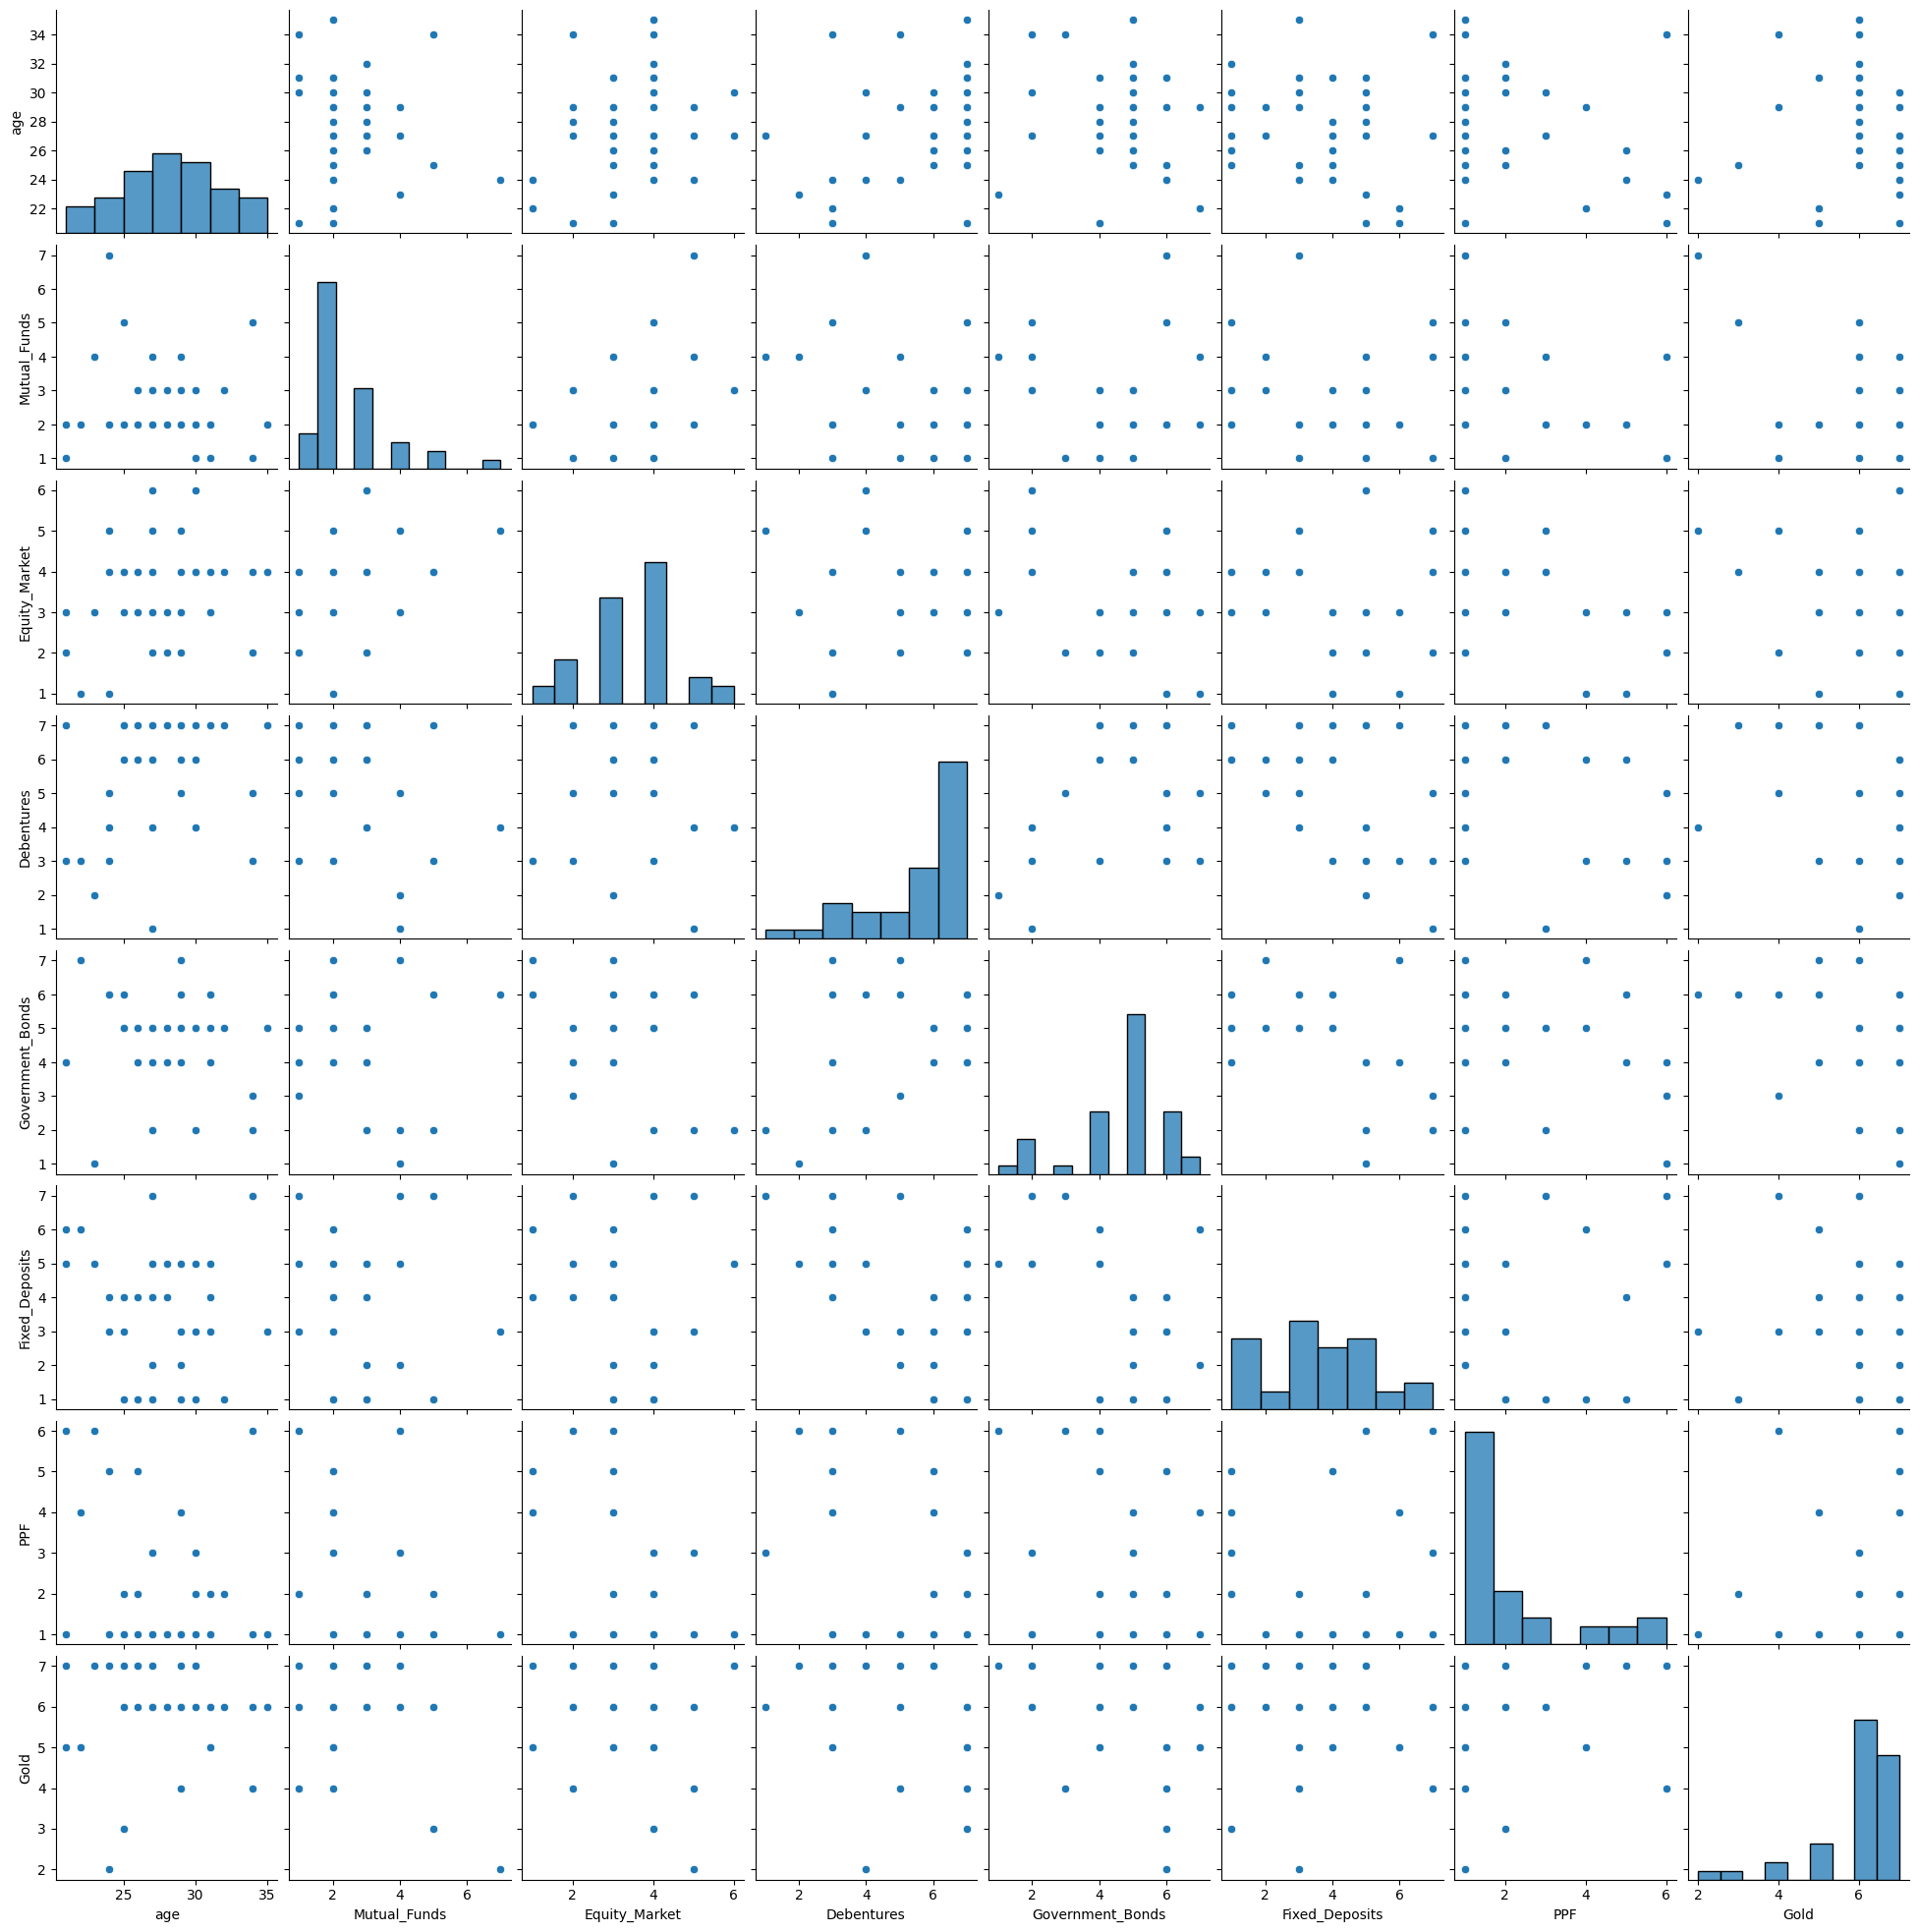

In [18]:

sns.pairplot(df)


<Axes: >

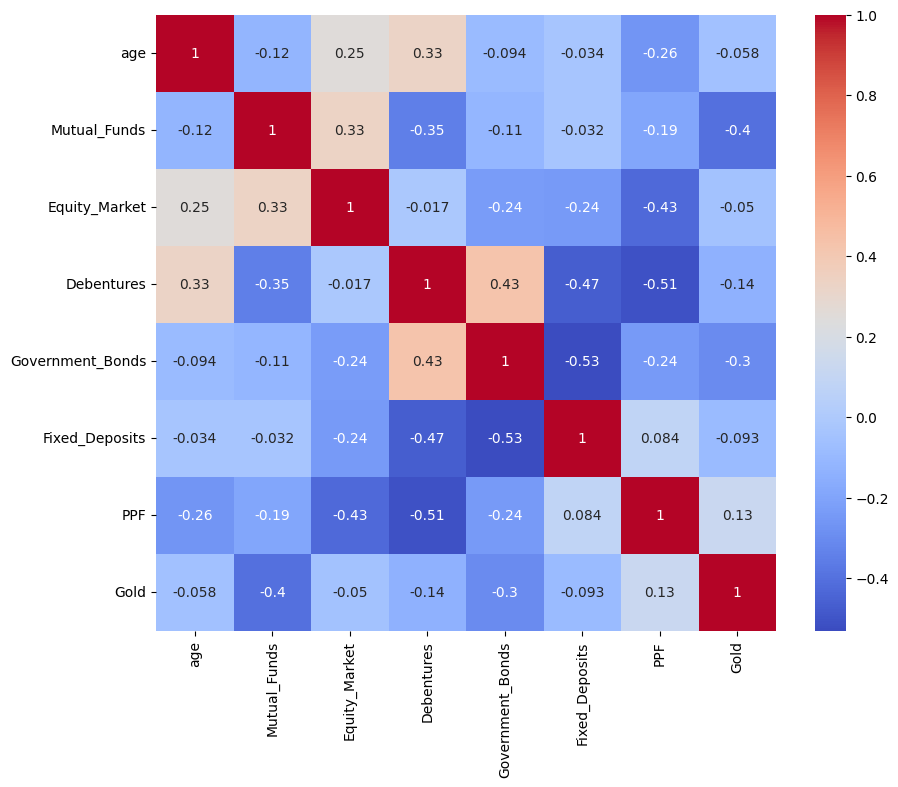

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [31]:


# Creating Age Bins of Two Years Each
max_age = df['age'].max()
bins = list(range(0, max_age + 2, 2))  # +2 to include the maximum age
df['Age_Group'] = pd.cut(df['age'], bins=bins)
print("\nCounts in Age Groups:\n", df['Age_Group'].value_counts())
print("\n Maximum Age:", df['age'].max())


Counts in Age Groups:
 (26, 28]    9
(28, 30]    8
(24, 26]    7
(30, 32]    5
(22, 24]    4
(20, 22]    3
(34, 36]    2
(32, 34]    2
(2, 4]      0
(0, 2]      0
(16, 18]    0
(14, 16]    0
(12, 14]    0
(10, 12]    0
(8, 10]     0
(6, 8]      0
(4, 6]      0
(18, 20]    0
Name: Age_Group, dtype: int64

 Maximum Age: 35


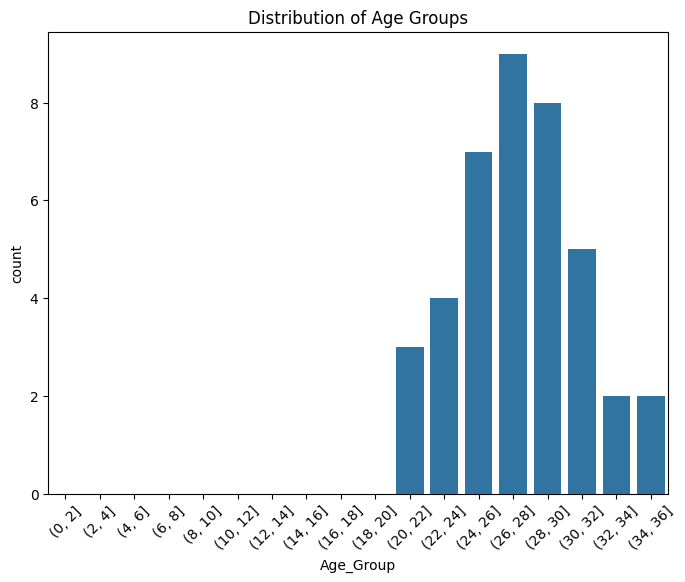

In [30]:
# Distribution of Age Groups
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Age Groups")
plt.show()

In [35]:

df['Age_Group'] = pd.cut(df['age'], bins=bins, right=False)
investment_cols = ['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

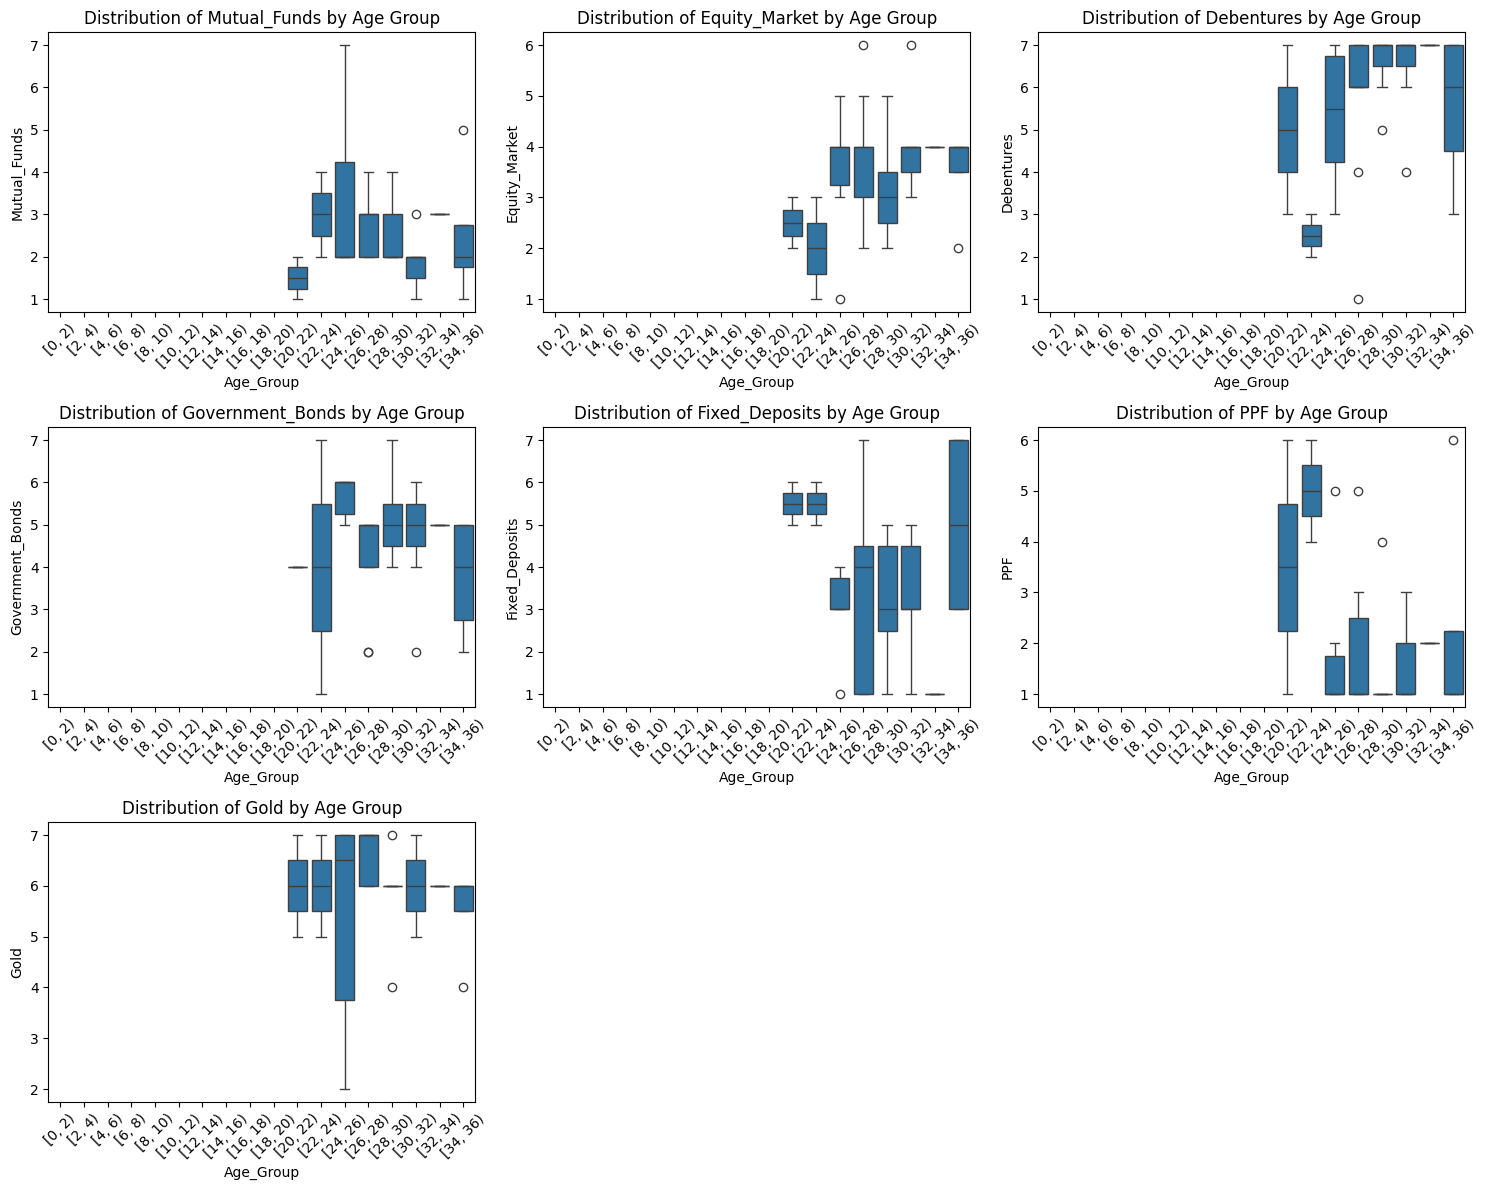

In [38]:
# Plotting distributions grouped by Age Group
plt.figure(figsize=(15, 12))
for i, col in enumerate(investment_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Age_Group', y=col, data=df)
    plt.title(f'Distribution of {col} by Age Group')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


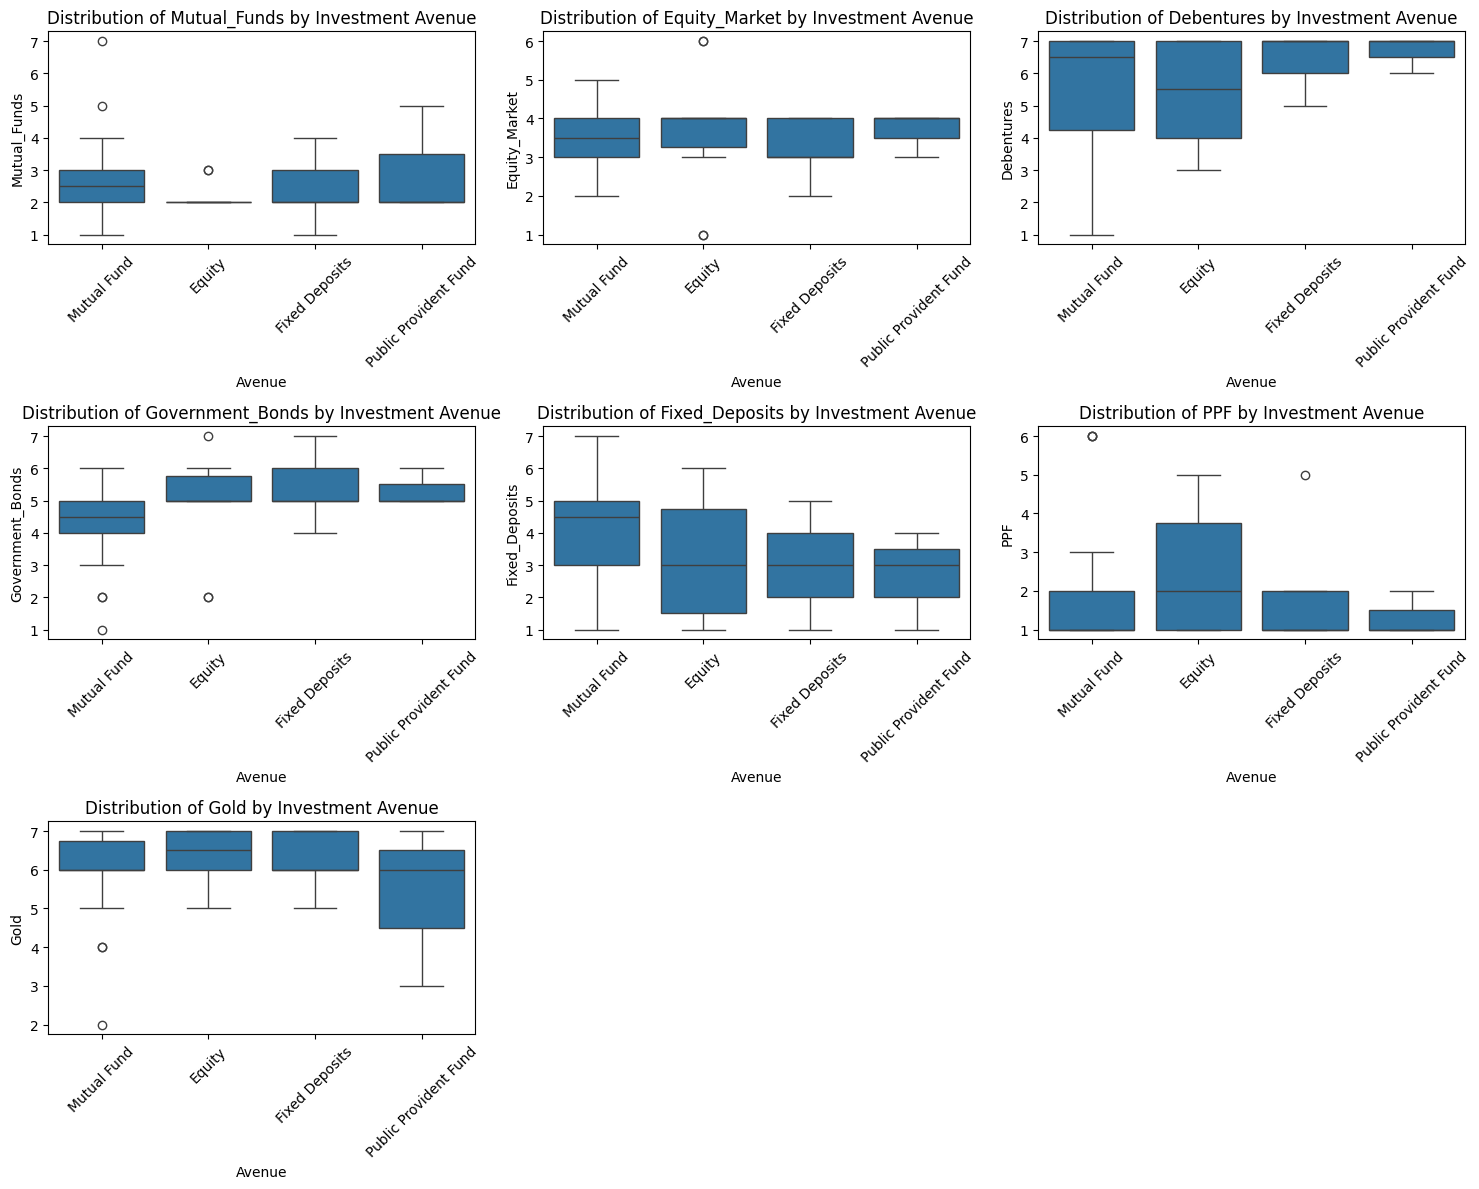

In [39]:
#Grouped by Avenue
plt.figure(figsize=(15, 12))
for i, col in enumerate(investment_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Avenue', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col} by Investment Avenue')
plt.tight_layout()
plt.show()

In [44]:
# Seperate the categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# consturct scaling and transformation of data 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

#  apply the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
data_np = np.array(pipeline.fit_transform(df))
data_np

array([[ 1.76352838, -1.3111603 , -1.31961005, ...,  0.        ,
         0.        ,  1.        ],
       [-1.3653123 ,  1.22656931, -0.42495917, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62576814,  0.38065944,  2.25899348, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.79643217,  2.07247918,  0.46969171, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.9102082 , -0.46525043,  0.46969171, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.34132807,  1.22656931, -0.42495917, ...,  0.        ,
         0.        ,  0.        ]])

# Part 2 : Model Construction 
##Steps

The steps of the model construction are as follows:
    
    1. Define the functions
        1.1 Define the loss function
        1.2 Define the optimizer
        1.3 Define the activation fun ction
        
    2. Define the model
        2.1 Define the input layer
        2.2 Define the hidden layers
        2.3 Define the output layer
        
    3. Define the training process
        3.1 Define the forward propagation and backward propagation
     
    

In [70]:

class SelfOrganizingMap:
    def __init__(self, dimensions, iterations, learning_rate, grid_size):
        self.dimensions = dimensions
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.grid_size = grid_size
        self.weights = np.random.rand(grid_size[0], grid_size[1], dimensions)

    def train(self, data):
        for i in range(self.iterations):
            # Decrease learning rate and neighborhood radius over time
            lr = self.learning_rate * (1 - i / self.iterations)
            for x in data:
                self.update_weights(x, lr)

    def update_weights(self, x, lr):
        # Find the BMU (Best Matching Unit)
        bmu_idx = self.find_bmu(x)
        for i in range(self.weights.shape[0]):
            for j in range(self.weights.shape[1]):
                # Update weights based on neighborhood function and learning rate
                distance = np.linalg.norm(np.array([i, j]) - np.array(bmu_idx))
                self.weights[i, j] += lr * np.exp(-distance**2 / (2 * (lr**2))) * (x - self.weights[i, j])

    def find_bmu(self, x):
        bmu_idx = None
        min_dist = np.inf
        for i in range(self.weights.shape[0]):
            for j in range(self.weights.shape[1]):
                dist = np.linalg.norm(x - self.weights[i, j])
                if dist < min_dist:
                    min_dist = dist
                    bmu_idx = (i, j)
        return bmu_idx
    
    def topological_error(self, data):
    
        error_count = 0
        for x in data:
            # Find the first and second BMUs
            first_bmu, second_bmu = self.find_first_second_bmus(x)
            if not self.are_adjacent(first_bmu, second_bmu):
                error_count += 1
        return error_count / len(data)

    def find_first_second_bmus(self, x):
        first_bmu = None
        second_bmu = None
        min_dist = np.inf
        second_min_dist = np.inf
        for i in range(self.weights.shape[0]):
            for j in range(self.weights.shape[1]):
                dist = np.linalg.norm(x - self.weights[i, j])
                if dist < min_dist:
                    second_min_dist = min_dist
                    second_bmu = first_bmu
                    min_dist = dist
                    first_bmu = (i, j)
                elif dist < second_min_dist:
                    second_min_dist = dist
                    second_bmu = (i, j)
        return first_bmu, second_bmu

    def are_adjacent(self, idx1, idx2):
        # Check if two nodes are adjacent in the grid
        return np.linalg.norm(np.array(idx1) - np.array(idx2)) <= 1
    
    
    def quantization_error(self, data):
            error = 0
            for x in data:
                bmu_idx = self.find_bmu(x)
                bmu = self.weights[bmu_idx[0], bmu_idx[1]]
                error += np.linalg.norm(x - bmu)
            return error / len(data)
        
    def consistency_check(self, data, num_runs=5):
        results = []
        for run in range(num_runs):
            # Reinitialize weights
            self.weights = np.random.rand(self.grid_size[0], self.grid_size[1], self.dimensions)
            self.train(data)
            qe = self.quantization_error(data)
            te = self.topological_error(data)
            weight_matrix = self.weights.copy()
            results.append({'run': run+1, 'qe': qe, 'te': te, 'weights': weight_matrix})
        return results

In [71]:
som = SelfOrganizingMap(dimensions=data_np.shape[1], iterations=1000, learning_rate=0.7, grid_size=(10, 10)) # Grid 10x10 = 100 neurons

som_results = som.consistency_check(data_np, num_runs=5)
for result in som_results:
    print(f"Run {result['run']}, QE: {result['qe']}, TE: {result['te']}")

Run 1, QE: 0.22236071802482335, TE: 0.225
Run 2, QE: 0.46819739778350566, TE: 0.25
Run 3, QE: 0.14808709523831354, TE: 0.1
Run 4, QE: 0.22362322088075293, TE: 0.2
Run 5, QE: 0.09713839439244125, TE: 0.2


In [ ]:
# Consistancy Check

In [ ]:
# Weight Matrix

In [ ]:


def plot_all_weight_matrices(som_results, grid_size, dimensions):
    num_runs = len(som_results)
    fig, axes = plt.subplots(1, num_runs, figsize=(num_runs * 5, 5))  # Adjust figsize as needed

    for i, result in enumerate(som_results):
        run_number = result['run']
        weights = result['weights']
        ax = axes[i]
        im = ax.imshow(weights.reshape((grid_size[0], grid_size[1] * dimensions)))
        ax.set_title(f"Run {run_number}")

    fig.colorbar(im, ax=axes.ravel().tolist())
    plt.show()


plot_all_weight_matrices(som_results, som.grid_size, som.dimensions)


# Quantization Error
The Quantization Error is the average distance between each data point and its Best Matching Unit (BMU) in the SOM.
It quantifies the average error (or dissimilarity) made when the SOM quantizes the input data, i.e., when it maps the high-dimensional input data onto the lower-dimensional grid.
Role as an Evaluation Metric:

A lower QE suggests that the SOM has done a better job at accurately mapping the input data onto the grid. It means that the neurons (nodes) of the SOM have weights that closely match the input data points.
In contrast, a higher QE indicates that the data points are, on average, farther from their BMUs, suggesting a poorer representation of the data on the SOM.
Interpreting QE:

While a low QE is generally desirable, it's also important to consider it in the context of the SOM's purpose. A very low QE might mean the map is overfitting to the input data, especially if the grid size is too large.
The QE should be balanced with other factors like the topographic error (which measures the preservation of data topology) and the interpretability of the SOM.
Use in Model Tuning:

QE can be used to tune the parameters of a SOM, such as grid size, learning rate, and the number of iterations. By evaluating how QE changes with different parameters, you can find a configuration that provides a good representation of your data.

Basically, QE value can give you an indication of how closely the SOM's neurons represent the input data

In [ ]:
Topological Error 

In [64]:
# Quantization Error
qe = som.quantization_error(data_np)
te = som.topological_error(data_np)
qe, te

0.06338098685733995